<a href="https://colab.research.google.com/github/garrisonreid/NC-Schools/blob/master/NCCounties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install geopandas
!pip install folium
!pip install branca
!pip install descartes

import geopandas as gpd
import pandas as pd
import branca
import folium

from shapely.geometry import Point
!pip install plotly

In [0]:
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz  
import os
os.chdir('spatialindex-src-1.8.5')
!./configure
!make
!make install
!pip install rtree
!ldconfig

from rtree import index
from rtree.index import Rtree


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  2336k      0 --:--:-- --:--:-- --:--:-- 2336k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [0]:
folium.__version__

'0.8.3'

Let's get some JSON data from the web - both a point layer and a polygon GeoJson dataset with some population data.

In [0]:
states = gpd.read_file(r"https://rawcdn.githack.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json", driver='GeoJSON')

cities = gpd.read_file(r"https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_populated_places_simple.geojson", driver='GeoJSON')

In [0]:
counties = gpd.read_file(r"https://opendata.arcgis.com/datasets/34acbf4a26784f189c9528c1cf317193_0.geojson", driver='GeoJSON')
counties.describe()
counties.head()

,FID,OBJECTID,PERIMETER,CO_NAME,CO_ABBR,ACRES,Shape_Leng,Shape_Area,RO,geometry
0,1,1,156472.984375,ROCKINGHAM,ROCK,366053.062500,513361.787377,1.594526e+10,WSRO,"POLYGON ((-79.5324702220893 36.241411972682, -..."
1,2,2,166183.500000,GUILFORD,GUIL,420968.937500,545220.367738,1.833739e+10,WSRO,"POLYGON ((-80.03515361458049 36.2571685116904,..."
2,3,3,143114.546875,ALAMANCE,ALAM,278127.031250,469534.986553,1.211521e+10,WSRO,"POLYGON ((-79.5324702220893 36.241411972682, -..."
3,4,4,116938.171875,ALEXANDER,ALEX,168640.984375,383654.655146,7.345997e+09,MRO,"POLYGON ((-81.0291469849307 36.045731871263, -..."
4,5,5,180894.171875,RANDOLPH,RAND,505667.968750,593483.622166,2.202688e+10,WSRO,"POLYGON ((-80.04712211774989 35.9209165299746,..."


And take a look at what our data looks like:

In [0]:
min, max = counties['ACRES'].quantile([0.05,0.95]).apply(lambda x: round(x, 2))

mean = round(counties['ACRES'].mean(),2)


print(f"Min: {min}", f"Max: {max}", f"Mean: {mean}", sep="\n\n")

Min: 152584.33

Max: 608283.25

Mean: 337048.72


This looks better. Our min and max values for the colorscale are much closer to the mean value now. Let's run with these values, and make a colorscale. I'm just going to use a sequential light-to-dark color palette from the [ColorBrewer](http://colorbrewer2.org/#type=sequential&scheme=Purples&n=5).

In [0]:
colormap = branca.colormap.LinearColormap(
    colors=['#f2f0f7','#cbc9e2','#9e9ac8','#756bb1','#54278f'],
    index=counties['ACRES'].quantile([0.2,0.4,0.6,0.8]),
    vmin=min,
    vmax=max
)

colormap.caption="Population Density in the United States"

colormap


In [0]:
# pop_ranked_cities.head(5)
counties.head()

,FID,OBJECTID,PERIMETER,CO_NAME,CO_ABBR,ACRES,Shape_Leng,Shape_Area,RO,geometry
0,1,1,156472.984375,ROCKINGHAM,ROCK,366053.062500,513361.787377,1.594526e+10,WSRO,"POLYGON ((-79.5324702220893 36.241411972682, -..."
1,2,2,166183.500000,GUILFORD,GUIL,420968.937500,545220.367738,1.833739e+10,WSRO,"POLYGON ((-80.03515361458049 36.2571685116904,..."
2,3,3,143114.546875,ALAMANCE,ALAM,278127.031250,469534.986553,1.211521e+10,WSRO,"POLYGON ((-79.5324702220893 36.241411972682, -..."
3,4,4,116938.171875,ALEXANDER,ALEX,168640.984375,383654.655146,7.345997e+09,MRO,"POLYGON ((-81.0291469849307 36.045731871263, -..."
4,5,5,180894.171875,RANDOLPH,RAND,505667.968750,593483.622166,2.202688e+10,WSRO,"POLYGON ((-80.04712211774989 35.9209165299746,..."


Alright, let's build a map!

In [0]:
type(counties)

geopandas.geodataframe.GeoDataFrame

In [0]:
type(states)

geopandas.geodataframe.GeoDataFrame

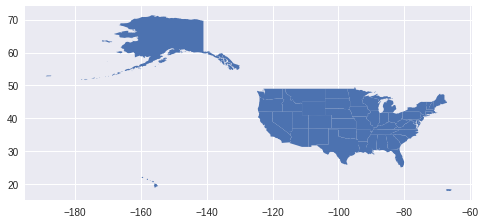

In [0]:
states.plot()

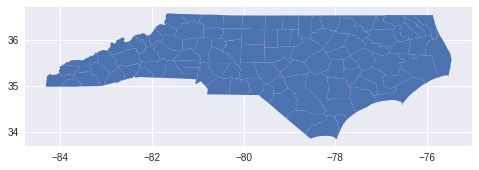

In [0]:
counties.plot()

In [0]:
schools = folium.FeatureGroup(name='Schools', control=True)
import sys
sys.getsizeof(schools)

56

In [0]:
schoolsCSV = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRb8KD1KTtb5ks2Zt6ScD_fxUIWKv6JQSXTTqWnfuu14osP0A0PMBnjFNtFShsf7vjppbKyWB3JCnsy/pub?output=csv')
schoolsCSV=schoolsCSV.dropna(subset=['Longitude'])
schoolsCSV=schoolsCSV.dropna(subset=['Latitude'])
schoolsCSV=schoolsCSV.dropna(subset=['FRLS'])

schoolsCSV[['School Name', 'Latitude', 'Longitude', 'FRLS']].head()
schoolsCSV['FRLS'].describe()
# schoolsCSV.columns.values

count    2613.000000
mean      340.382319
std       232.839274
min         3.000000
25%       172.000000
50%       298.000000
75%       460.000000
max      2036.000000
Name: FRLS, dtype: float64

In [54]:
def make_point(row):
    return Point(row.Longitude, row.Latitude)

def make_marker(row):
  return Markers(row['School Name'])
  
pointsS = schoolsCSV.apply(make_point, axis=1)
schoolLocations = gpd.GeoDataFrame(schoolsCSV, geometry=pointsS)
schoolLocations.crs = {'init': 'epsg:4326'}

schoolnames = schoolLocations['School Name']
locations = schoolLocations[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
# len(locationlist) # 2661
# len(schoolnames) # 2661
# len(schoolLocations['FRLS']) #2613

m = folium.Map(location=[35, -80], zoom_start=7)

for i in schoolLocations['FRLS']:
  if schoolLocations['FRLS'][i] > 2000:
      color="red"
  elif schoolLocations['FRLS'][i] > 500:
      color="orange"
  elif schoolLocations['FRLS'][i] > 250:
      color="yellow"
  else:
      color="green"
  schoolLocations['markerColor'] = color

schoolLocations[['FRLS','markerColor']].head()
# schoolLocations[['FRLS','markerColor']].tail()

# for point in range(0, len(locationlist)):
#  folium.CircleMarker(locationlist[point], radius=0.5).add_to(m) # , color=color , popup=schoolnames[point]
# m

,FRLS,markerColor
0,2036.0,orange
1,1868.0,orange
2,1757.0,orange
3,1671.0,orange
4,1667.0,orange


In [55]:
# Instantiate our folium Map.
m = folium.Map(location=[35,-80], zoom_start=7)

# Create some folium GeoJson objects from our GeoDataFrames.
stategeo = folium.GeoJson(states
# #                           ,
# #                           name='US States',
# #                           style_function=lambda x: {'fillColor': 'green', 'color': 'black',
# #                                                     'weight':2, 'fillOpacity':0.2},
# #                           tooltip=folium.GeoJsonTooltip(fields=['name', 'density'], 
# #                                             aliases=['State', 'Density'], 
# #                                             localize=True)
                         ).add_to(m)

# citygeo = folium.GeoJson(pop_ranked_cities,
#                          name='US Cities',
#                          tooltip=folium.GeoJsonTooltip(fields=['nameascii','pop_max'],
#                                                        aliases=['','Population Max'],
#                                                        localize=True)
#                         ).add_to(m)

# Add some Search boxes to the map that reference the GeoDataFrames with some different parameters passed to the 
# arguments.
# statesearch = Search(layer=stategeo, 
#                      geom_type='Polygon', 
#                      placeholder="Search for a US State", 
#                      collapsed=False, 
#                      search_label='name',
#                      weight=3
#                     ).add_to(m)

# citysearch = Search(layer=citygeo, 
#                     geom_type='Point', 
#                     placeholder="Search for a US City", 
#                     collapsed=True, 
#                     search_label='nameascii'
#                    ).add_to(m)

# Add a LayerControl.
# folium.LayerControl().add_to(m)

# And the Color Map legend.
# colormap.add_to(m)

m